### T-Statistics
![Alt text](../media/3_ttest1.gif)
#### What's a T-Test
- A T-test is a statistical method used to determine if there is a significant difference between the means of two groups.
- It's particularly useful when dealing with small sample sizes or unknown population variances.

- **Purpose**: To see if two groups differ significantly. For instance, are the test scores of Group A and Group B different due to some factor, or just by chance?
- **Significance**: Helps in making informed decisions based on data.

**Why T-Test?**
- T-tests are essential in situations where we need to determine if the difference between groups is substantial or just a random occurrence.
- They are particularly beneficial when dealing with small sample sizes or when the population standard deviation is unknown.

**Real-World Example:**
- Imagine a scenario where two classrooms (Group A and Group B) are trying different teaching methods. We want to know if one method leads to significantly better performance on a test. A T-test can help us determine whether any observed differences in test scores are statistically significant.

#### Steps in Conducting a T-Test

**1. Collect Data:**
- Gather data from the two groups you are comparing. For instance, test scores from Group A and Group B.

**2. Calculate Means:**
- Use Python to find the average score for each group.
  

In [ ]:
import numpy as np

# Sample data
group_a_scores = np.array([75, 88, 91, 83, 85])
group_b_scores = np.array([89, 95, 91, 90, 94])

# Calculate means
mean_a = np.mean(group_a_scores)
mean_b = np.mean(group_b_scores)
print(f"Mean A: {mean_a} Mean B: {mean_b}")

Mean A: 84.4 Mean B: 91.8




**3. Check Variability:**
- Examine the spread of scores within each group.
  

In [ ]:
# Calculate standard deviation
std_a = np.std(group_a_scores, ddof=1)
std_b = np.std(group_b_scores, ddof=1)
print(f"Std A: {std_a} Std B: {std_b}")

Std A: 6.06630035524124 Std B: 4.54972526643093




**4. Compute the T-Statistic:**
- The T-statistic is calculated using the formula: \[t = \frac{\text{Difference in Means}}{\text{Standard Error}}\]
  

In [ ]:
from scipy.stats import ttest_ind

# Perform T-test
t_stat, p_val = ttest_ind(group_a_scores, group_b_scores)
print(f"T Statistic: {t_stat} P Val: {p_val}")

T Statistic: -2.5088349633969953 P Val: 0.03643700469671332




**5. Compare to Critical Value:**
After computing the T-statistic, the next step is to compare it to a critical value. This comparison will help us determine whether the observed differences between the two groups are statistically significant.

- **Finding the Critical Value**:
  Let's assume we're using a 95% confidence level (commonly used in statistical analysis). This corresponds to an alpha level of 0.05.
  For our example, let's say the degrees of freedom (df) are 8 (which is typically n1 + n2 - 2; assuming each group has 5 members, df = 5 + 5 - 2 = 8).
  Looking up a T-table or using a Python function, we find the critical value for df = 8 and alpha = 0.05 is approximately 2.306.

- **Example Calculation**:
  Suppose the calculated T-statistic from our data is 2.5. We then compare this with the critical value of 2.306.
  

In [ ]:
t_statistic = 2.5  # From the T-test
critical_value = 2.306  # From T-table or Python function

if abs(t_statistic) > critical_value:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")




**6. Determine Significance:**
The final step is to interpret the results of the T-test in terms of statistical significance.

### Interpretation of T and P Values

**T-Statistic:**
- The T-statistic indicates how much the group means differ from each other.
- A high absolute value of the T-statistic suggests a large difference between groups.
- **Example**:
  - If the T-statistic is 3 and the critical value is 2, the groups are significantly different.

**P-Value:**
- The P-value tells you the probability of observing your data (or something more extreme) if the null hypothesis is true.
- A low P-value (typically < 0.05) suggests that the observed data is very unlikely under the null hypothesis, indicating a significant result.
- **Example**:
  - If the P-value is 0.03, there's a 3% chance of observing the data if there's no real difference between groups. Since 3% is less than the standard threshold of 5%, we consider the result significant.

### Examples for T and P Value Interpretation

#### Example 1: Testing a New Teaching Method
- **Scenario**: Comparing test scores between a class using a traditional teaching method and a class using a new method.
- **T-Statistic**: 2.5
- **P-Value**: 0.02
- **Interpretation**:
  - Since the T-statistic (2.5) is greater than the critical value (usually around 2 for a 95% confidence level), and the P-value (0.02) is less than 0.05, we conclude that the new teaching method significantly improves test scores.

#### Example 2: Pharmaceutical Study
- **Scenario**: Comparing symptom improvement in patients taking a new drug versus a placebo.
- **T-Statistic**: 1.8
- **P-Value**: 0.08
- **Interpretation**:
  - The T-statistic (1.8) is less than the critical value (around 2), and the P-value (0.08) is higher than 0.05. Therefore, we cannot conclude that the new drug is more effective than the placebo.

In both examples, the T-statistic and P-value together help us determine the significance of our results. A high T-statistic and a low P-value typically indicate a significant difference between the groups being compared.

- **Interpreting the Result**:
  If the absolute value of the T-statistic is greater than the critical value, it suggests that the difference in means is not likely due to random chance. In our example, since 2.5 (T-statistic) is greater than 2.306 (critical value), we can conclude that there is a statistically significant difference between the test scores of Group A and Group B.

- **Insights**:
  A statistically significant result implies that the teaching methods in the two groups likely had a different impact on the test scores. This can lead to further investigation into what aspects of the teaching method were more effective, potentially influencing future teaching strategies.

### Exercise: T-Test on the Iris Flower Dataset

#### Scenario: Botanical Study
- **Data**: Petal lengths of Iris Setosa and Iris Versicolor species.
- **Task**: Determine if there is a significant difference in the petal lengths of these two Iris species.

#### Steps for the Exercise
1. **Load and Prepare Data**: You will load the Iris dataset and extract the petal lengths for the two species.
2. **Perform the T-test**: Calculate the T-statistic and P-value to compare the petal lengths.
3. **Interpret the Results**: Based on these values, determine if the differences in petal lengths are statistically significant.

#### Python Code for Data Preparation and T-test


In [ ]:
from sklearn.datasets import load_iris
from scipy.stats import ttest_ind
import pandas as pd

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Extract petal lengths for Setosa and Versicolor
setosa_petal_length = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']

# Perform T-test
t_stat, p_val = ttest_ind(setosa_petal_length, versicolor_petal_length)

# Output the T-statistic and P-value
print("Iris Petal Length Comparison: T-statistic =", t_stat, "P-value =", p_val)

ModuleNotFoundError: No module named 'sklearn'



#### Your Task
- Execute the provided Python code to calculate the T-statistic and P-value.
- Analyze the results:
  - Is the T-statistic high enough to suggest a significant difference in petal lengths?
  - Does the P-value indicate that this difference is statistically significant?
- Discuss what your findings suggest about the petal lengths of these two Iris species.

#### After you've finished
* Add the following code to the code provided above and run it:
  * Analze the plots and try to see the relatioship between the visual represantation of the distributions and the t/p values.



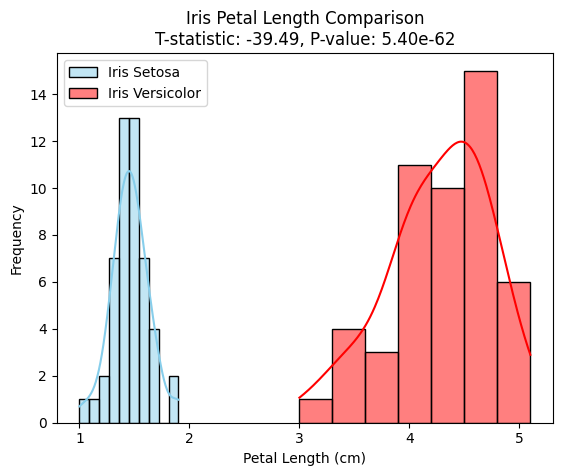

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the distributions
sns.histplot(setosa_petal_length, color="skyblue", label="Iris Setosa", kde=True)
sns.histplot(versicolor_petal_length, color="red", label="Iris Versicolor", kde=True)

# Adding titles and labels
plt.title(
    f"Iris Petal Length Comparison\nT-statistic: {t_stat:.2f}, P-value: {p_val:.2e}"
)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.legend()

plt.show()

In [ ]:
import seaborn as sns
from scipy import stats
iris = sns.load_dataset('iris')
virg = iris[iris['species'] == 'virginica']['sepal_width']
vers = iris[iris['species'] == 'versicolor']['sepal_width']

stats.ttest_ind(virg, vers)

TtestResult(statistic=3.2057607502218186, pvalue=0.0018191004238894803, df=98.0)

In [ ]:
import seaborn as sns
from scipy import stats
iris_df = sns.load_dataset('iris')
print(iris_df.columns)
setosa_petal_length = iris_df[iris_df['species'] == 'setosa']['petal_length']
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal_length']

# Perform T-test
t_stat, p_val = ttest_ind(setosa_petal_length, versicolor_petal_length)

# Output the T-statistic and P-value
print("Iris Petal Length Comparison: T-statistic =", t_stat, "P-value =", p_val)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Iris Petal Length Comparison: T-statistic = -39.492719391538095 P-value = 5.404910513441677e-62




## Understanding the T-Table

The T-table, or T-distribution table, is a crucial tool in statistics, especially when conducting T-tests. It helps determine the critical value needed to assess the significance of the test results.

**What is the T-Table?**
- The T-table lists critical values for the T-distribution, a probability distribution that is used when the sample size is small, and the population standard deviation is unknown.
- It includes critical values for various levels of significance (alpha) and degrees of freedom (df), which are related to the sample size.

**How to Use a T-Table:**
1. **Degrees of Freedom (df)**: Calculated based on the type of T-test and sample size. For example, in an independent samples T-test with sample sizes n1 and n2, df = n1 + n2 - 2.
2. **Level of Significance (alpha)**: Common levels are 0.05 (5%) for a 95% confidence level, and 0.01 (1%) for a 99% confidence level. This is the probability of rejecting the null hypothesis when it is true.
3. **Locate df and Alpha in T-Table**: Find the row for your df and the column for your alpha to locate the critical value.

**Visual Example of a T-Table:**
- A T-table typically looks like this:

| df\alpha | 0.10  | 0.05  | 0.025 | 0.01  |
|----------|-------|-------|-------|-------|
| 1        | value | value | value | value |
| 2        | value | value | value | value |
| ...      | ...   | ...   | ...   | ...   |
| 20       | value | value | value | value |

- Each cell in the table contains the critical value for a specific df and alpha.

**Using Python to Find Critical Values:**
- While the T-table is useful, Python can also calculate critical values, eliminating the need for manual table lookups.
  

In [ ]:
from scipy.stats import t

# Example: finding critical value for df = 20 and alpha = 0.05
df = 20
alpha = 0.05
critical_value = t.ppf(1 - alpha/2, df)

# Output the critical value
print("Critical Value:", critical_value)



This code uses the `scipy.stats.t.ppf` function, which finds the t-score at a given quantile and degree of freedom. It's a powerful tool that simplifies the process of finding critical values for hypothesis testing.

### Exercise: Understanding the T-Table and Critical Values

#### Objective
This exercise is designed to help you understand how to use a T-table and interpret critical values in the context of T-tests.

#### Scenario: Academic Performance Study
- **Data**: Scores from two different teaching methods.
- **Task**: Determine if there is a significant difference in the academic performance between the two teaching methods.

#### Steps for the Exercise
1. **Generate Data**: Create two sets of scores representing two teaching methods.
2. **Compute the T-Statistic**: Use Python to perform a T-test on these scores.
3. **Use the T-Table**: Find the critical value for your calculated degrees of freedom (df) and alpha level.
4. **Interpret the Critical Value**: Determine if the T-statistic exceeds the critical value, indicating significance.
5. **Draw Conclusions**: Based on your findings, conclude whether the teaching methods have a significantly different impact on scores.

#### Python Code for Data Generation and T-test


In [ ]:
import numpy as np
from scipy.stats import ttest_ind, t

# Generating sample data
np.random.seed(0)
method_1_scores = np.random.normal(70, 10, 30)
method_2_scores = np.random.normal(75, 10, 30)

# Perform T-test
t_stat, _ = ttest_ind(method_1_scores, method_2_scores)

# Calculate degrees of freedom
df = len(method_1_scores) + len(method_2_scores) - 2

# Assuming a 95% confidence level (alpha = 0.05)
alpha = 0.05
critical_value = t.ppf(1 - alpha/2, df)

print("T-statistic:", t_stat)
print("Degrees of Freedom:", df)
print("Critical Value (95% confidence):", critical_value)



#### Your Task
- Run the provided Python code to calculate the T-statistic, degrees of freedom, and critical value.
- Compare the T-statistic to the critical value:
  - If the T-statistic is greater than the critical value, the difference in teaching methods is significant.
- Discuss the implications: What does this mean for the effectiveness of the two teaching methods?

#### Reflective Questions
- How does changing the alpha level affect the critical value?
- What would be the impact on your conclusion if the standard deviations of the scores were larger?

This exercise will enhance your understanding of using T-tables and critical values in statistical analysis, helping you make informed decisions based on T-test results.

